<a href="https://colab.research.google.com/github/prodigyxiao/ML_Practice/blob/master/Keras_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


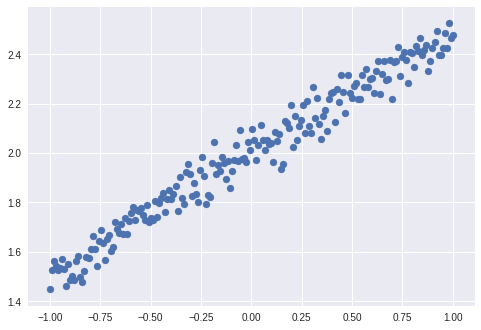

In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense # Full connected
import matplotlib.pyplot as plt

# Create data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# Plot data
plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # train 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 40 data points

In [5]:
# Create model
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1)) # 定义下一层时，会自动把上层的output作为input

# Declare loss function and optimizer
model.compile(loss='mse', optimizer='sgd')

# Training
print('Training -----------')
for step in range(1001):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


Training -----------
train cost:  4.385717
train cost:  0.14700773
train cost:  0.022288572
train cost:  0.007321513
train cost:  0.0038109198
train cost:  0.002923707
train cost:  0.0026982627
train cost:  0.0026409589
train cost:  0.0026263925
train cost:  0.0026226905
train cost:  0.0026217503



Testing ------------
40/40 [==============================] - 0s 59us/step
test cost: 0.0032538652885705233
Weights= [[0.49232113]] 
biases= [2.0040777]


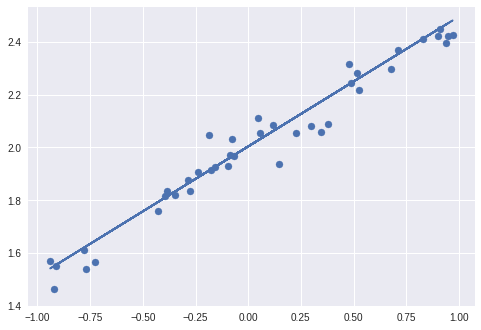

In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()